In [1]:
from sklearn.datasets import fetch_20newsgroups
from keras.utils import np_utils
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [2]:
x_train = newsgroups_train.data
x_test = newsgroups_test.data


y_train = newsgroups_train.target
y_test = newsgroups_test.target


print ("List of all 20 categories:")
print (newsgroups_train.target_names)




List of all 20 categories:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
print ("\n")
print ("Sample Email:")
print (x_train[0])
print('y_train:-',y_train[0])





Sample Email:
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





y_train:- 7


In [4]:
print ("Sample Target Category:")
print (y_train[0])
print (newsgroups_train.target_names[y_train[0]])

Sample Target Category:
7
rec.autos


In [5]:
y_train[:5]

array([ 7,  4,  4,  1, 14])

In [6]:
y_test[:5]

array([ 7,  5,  0, 17, 19])

# import nltk and preprocess libraries

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from nltk import pos_tag
from nltk.stem import PorterStemmer

nltk.download('punkt') ## error without this cmd
nltk.download('stopwords') 
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [8]:
def preprocessing(text):
  text2 = " ".join("".join([" " if ch in string.punctuation else ch for ch in text]).split())
  tokens = [word for sent in nltk.sent_tokenize(text2) for word in nltk.word_tokenize(sent)]
  tokens = [word.lower() for word in tokens]
  stopwds = stopwords.words('english')
  tokens = [token for token in tokens if token not in stopwds]
  tokens = [word for word in tokens if len(word)>=3]
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(word) for word in tokens]

  stemmer = PorterStemmer()
  tokens = [stemmer.stem(word) for word in tokens]

  tagged_corpus = pos_tag(tokens)
  Noun_tags = ['NN','NNP','NNPS','NNS']
  Verb_tags = ['VB','VBD','VBG','VBN','VBP','VBZ']

  lemmatizer = WordNetLemmatizer()

  def prat_lemmatize(token,tag):
    if tag in Noun_tags:
      return lemmatizer.lemmatize(token,'n')
    elif tag in Verb_tags:
      return lemmatizer.lemmatize(token,'v')
    else:
      return lemmatizer.lemmatize(token,'n')

  pre_proc_text = " ".join([prat_lemmatize(token,tag) for token,tag in tagged_corpus])

  return pre_proc_text

# Applying pre-processing on train and test data:

In [9]:
x_train_preprocessed = []
for i in x_train:
  x_train_preprocessed.append(preprocessing(i))
  

In [10]:
x_train_preprocessed[0]

'lerxst wam umd edu thing subject car nntp post host rac3 wam umd edu organ univ maryland colleg park line wonder anyon could enlighten car saw day door sport car look late 60 earli 70 call bricklin door realli small addit front bumper separ rest bodi know anyon tellm model name engin spec year product car make histori whatev info funki look car plea mail thank bring neighborhood lerxst'

In [11]:
x_test_preprocessed = []
for i in x_test:
  x_test_preprocessed.append(preprocessing(i))

In [12]:
x_test_preprocessed[0]

'v064mb9k ubvmsd buffalo edu neil gandler subject need info bonnevil organ univ buffalo line news softwar vax vm vnew nntp post host ubvmsd buffalo edu littl confu model bonnevil heard lse sse ssei could someon tell differ far featur perform also curiou know book valu prefer model much le book valu usual get word much demand time year heard mid spring earli summer best time buy neil gandler'

# building TFIDF vectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2),
stop_words='english', max_features= 10000,strip_accents='unicode',
norm='l2')

In [14]:
x_train_2 = vectorizer.fit_transform(x_train_preprocessed).todense()

x_test_2 = vectorizer.transform(x_test_preprocessed).todense()


# Deep Learning modules

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adadelta,Adam,RMSprop
from keras.utils import np_utils

In [16]:
np.random.seed(1337)
nb_classes = 20
batch_size = 64
nb_epochs = 20

In [17]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

## Deep Neural Network Model Building  using Pytorch

In [18]:
print('Xtrain:', x_train_2[0], 'Ytrain',  Y_train[0])

Xtrain: [[0. 0. 0. ... 0. 0. 0.]] Ytrain [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
print("Xtest:", x_test_2[0], "Ytest", y_test[0])

Xtest: [[0. 0. 0. ... 0. 0. 0.]] Ytest 7


In [20]:
Y_test = np_utils.to_categorical(y_test, nb_classes)
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
X_train_f=torch.FloatTensor(x_train_2)
X_test_f=torch.FloatTensor(x_test_2)
y_train_f=torch.LongTensor(y_train)
y_test_f=torch.LongTensor(y_test)

In [23]:
# from google.colab import drive
# drive.mount("/content/drive")

## to save input data 

In [24]:
# torch.save(X_train_f, 'x_train_f.pt')
# torch.save(X_test_f, 'x_test_f.pt')
# torch.save(y_train_f, 'y_train_f.pt')
# torch.save(y_test_f, 'y_test_f.pt')

In [25]:
# torch.load('x_train_f.pt')

In [26]:
X_train_f.shape

torch.Size([11314, 10000])

In [27]:
y_train_f.shape

torch.Size([11314])

In [28]:
X_test_f.shape

torch.Size([7532, 10000])

In [29]:
y_test_f.shape

torch.Size([7532])

In [30]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=10000,h1=1000,h2=500, h3=50,out_features=20):
        super().__init__()
        self.drop=nn.Dropout(p=0.5)

        self.f_connected1=nn.Linear(input_features,h1)
        self.f_connected2=nn.Linear(h1,h2)
        self.f_connected3=nn.Linear(h2,h3)

        self.out=nn.Linear(h3,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x= self.drop(x)

        x=F.relu(self.f_connected2(x))
        x= self.drop(x)

        x=F.relu(self.f_connected3(x))
        x= self.drop(x)

        x=self.out(x)
        return x

In [31]:

torch.manual_seed(20)
model1=ANN_Model()


In [32]:
model1.parameters

<bound method Module.parameters of ANN_Model(
  (drop): Dropout(p=0.5, inplace=False)
  (f_connected1): Linear(in_features=10000, out_features=1000, bias=True)
  (f_connected2): Linear(in_features=1000, out_features=500, bias=True)
  (f_connected3): Linear(in_features=500, out_features=50, bias=True)
  (out): Linear(in_features=50, out_features=20, bias=True)
)>

In [33]:



loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model1.parameters(), lr=0.01)



In [34]:
y_test_f.unique()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])

In [35]:
epochs=200
final_losses=[]
for i in range(epochs):
    i=i+1

    y_pred=model1.forward(X_train_f)
    loss=loss_function(y_pred,y_train_f)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 2.9987754821777344
Epoch number: 11 and the loss : 1.1200330257415771
Epoch number: 21 and the loss : 0.23846961557865143
Epoch number: 31 and the loss : 0.09612895548343658
Epoch number: 41 and the loss : 0.059603139758110046
Epoch number: 51 and the loss : 0.0468246191740036
Epoch number: 61 and the loss : 0.042678602039813995
Epoch number: 71 and the loss : 0.034212224185466766
Epoch number: 81 and the loss : 0.03437305986881256
Epoch number: 91 and the loss : 0.03383497893810272
Epoch number: 101 and the loss : 0.031668297946453094
Epoch number: 111 and the loss : 0.027922119945287704
Epoch number: 121 and the loss : 0.03245997428894043
Epoch number: 131 and the loss : 0.026147153228521347
Epoch number: 141 and the loss : 0.025099925696849823
Epoch number: 151 and the loss : 0.026091603562235832
Epoch number: 161 and the loss : 0.02667851373553276
Epoch number: 171 and the loss : 0.025136318057775497
Epoch number: 181 and the loss : 0.0214337576180696

## Test data performance

In [36]:
y_pred_train = model1.forward(X_train_f)
y_pred_train_prob = nn.Softmax(dim=1)(y_pred_train)
y_pred_train = y_pred_train_prob.argmax(1)

In [37]:
y_pred_train.shape

torch.Size([11314])

In [38]:
y_pred_test = model1.forward(X_test_f)
y_pred_test_prob = nn.Softmax(dim=1)(y_pred_test)
y_pred_test = y_pred_test_prob.argmax(1)

In [39]:
y_pred_test.shape

torch.Size([7532])

## Train Accuracy 

In [40]:
correct_pred_train = (y_pred_train == y_train_f).float()
train_acc = correct_pred_train.sum() / len(correct_pred_train)
    
train_acc = torch.round(train_acc * 100)
print('Train accuracy: ', train_acc)

Train accuracy:  tensor(99.)


## Train Classification report 

In [44]:
print (classification_report(y_train_f,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       480
           1       0.99      0.98      0.99       584
           2       0.98      0.97      0.98       591
           3       0.99      0.99      0.99       590
           4       0.99      0.99      0.99       578
           5       0.99      1.00      0.99       593
           6       0.99      0.98      0.99       585
           7       1.00      0.99      0.99       594
           8       0.99      1.00      1.00       598
           9       0.99      1.00      0.99       597
          10       0.99      0.99      0.99       600
          11       1.00      0.99      1.00       595
          12       0.98      0.99      0.98       591
          13       0.99      0.99      0.99       594
          14       0.99      1.00      0.99       593
          15       0.99      0.99      0.99       599
          16       0.99      0.99      0.99       546
          17       0.99    

## Train Confusion matrix

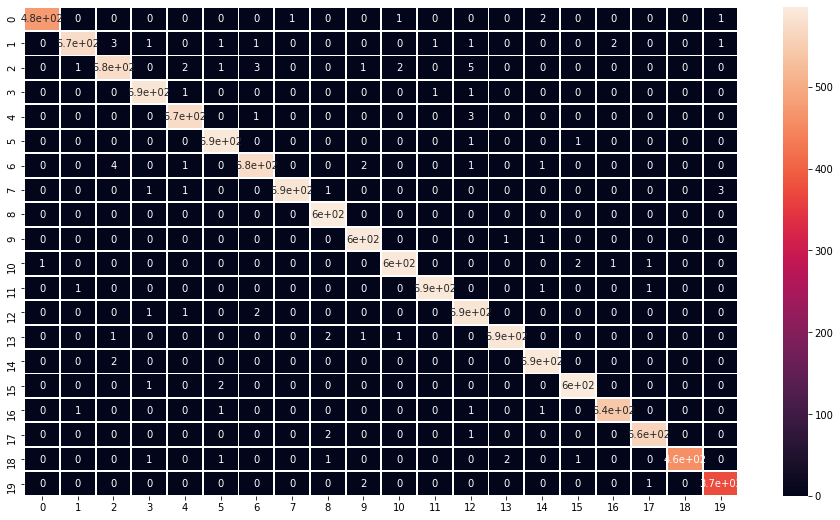

In [45]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train_f, y_pred_train))
plt.figure(figsize = (16,9))

sns.heatmap(confusion_matrix_df, annot=True, linewidths=.9)

## Test Accuracy

In [46]:
correct_pred_test = (y_pred_test == y_test_f).float()
test_acc = correct_pred_test.sum() / len(correct_pred_test)
    
test_acc = torch.round(test_acc * 100)
print('Test accuracy: ', test_acc)

Test accuracy:  tensor(77.)


## Test Classification report 

In [47]:
print (classification_report(y_test_f,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       319
           1       0.64      0.63      0.64       389
           2       0.68      0.62      0.65       394
           3       0.59      0.66      0.62       392
           4       0.69      0.74      0.71       385
           5       0.74      0.73      0.73       395
           6       0.75      0.78      0.76       390
           7       0.81      0.78      0.79       396
           8       0.86      0.90      0.88       398
           9       0.86      0.86      0.86       397
          10       0.88      0.95      0.91       399
          11       0.90      0.86      0.88       396
          12       0.67      0.68      0.68       393
          13       0.80      0.77      0.79       396
          14       0.88      0.89      0.88       394
          15       0.78      0.87      0.82       398
          16       0.75      0.84      0.79       364
          17       0.94    

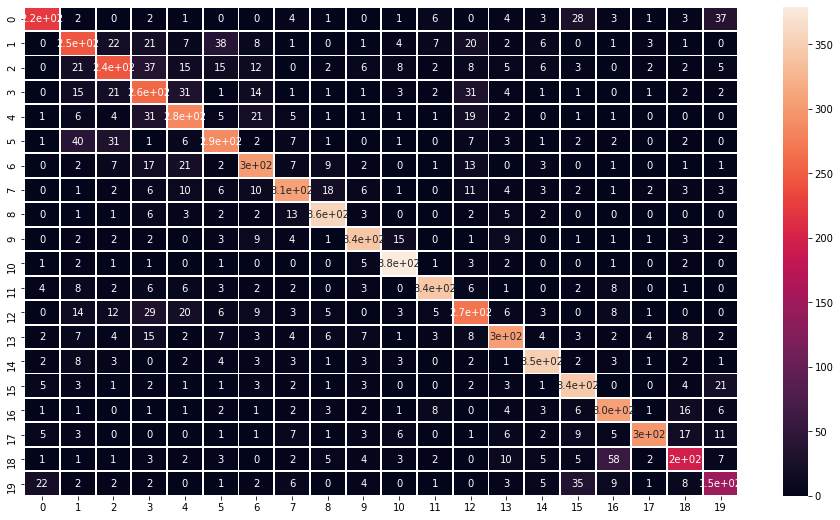

In [48]:
confusion_matrix_df_test = pd.DataFrame(confusion_matrix(y_test_f, y_pred_test))
plt.figure(figsize = (16,9))
sns.heatmap(confusion_matrix_df_test, annot=True, linewidths=.9)

#Deep Layer Model building in Keras

In [49]:
model = Sequential()
model.add(Dense(1000,input_shape= (10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              10001000  
_________________________________________________________________
activation (Activation)      (None, 1000)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2

# Start training 

In [50]:
model.fit(x_train_2, Y_train, batch_size=batch_size,
epochs=nb_epochs,verbose=1)

Epoch 1/20
177/177 [==============================] - 16s 89ms/step - loss: 2.5683
Epoch 2/20
177/177 [==============================] - 16s 89ms/step - loss: 0.6849
Epoch 3/20
177/177 [==============================] - 16s 89ms/step - loss: 0.3267
Epoch 4/20
177/177 [==============================] - 16s 89ms/step - loss: 0.1820
Epoch 5/20
177/177 [==============================] - 16s 89ms/step - loss: 0.1252
Epoch 6/20
177/177 [==============================] - 16s 89ms/step - loss: 0.0911
Epoch 7/20
177/177 [==============================] - 16s 89ms/step - loss: 0.0635
Epoch 8/20
177/177 [==============================] - 16s 89ms/step - loss: 0.0569
Epoch 9/20
177/177 [==============================] - 16s 88ms/step - loss: 0.0543
Epoch 10/20
177/177 [==============================] - 16s 89ms/step - loss: 0.0425
Epoch 11/20
177/177 [==============================] - 16s 89ms/step - loss: 0.0373
Epoch 12/20
177/177 [==============================] - 16s 89ms/step - loss: 0.0310
E

#Model Prediction


In [ ]:
y_train_predclass = model.(x_train_2,batch_size=batch_size)
y_test_predclass = model.predict_classes(x_test_2,batch_size=batch_size)
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
print ("\n\nDeep Neural Network - Train accuracy:"),
(round(accuracy_score( y_train, y_train_predclass),3))

In [ ]:
print ("\nDeep Neural Network - Test accuracy:")
(round(accuracy_score(y_test,y_test_predclass),3))

In [ ]:
print ("\nDeep Neural Network - Train Classification Report")
print (classification_report(y_train,y_train_predclass))

In [ ]:
print ("\nDeep Neural Network - Test Classification Report")
print (classification_report(y_test,y_test_predclass))